In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df=df.drop('Id',axis=1)

In [7]:
print(df['Species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
mapp={'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2
}
df['Species']=df['Species'].map(mapp)

In [9]:
df['Species'] = df['Species'].astype(float)


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df['Species']=df['Species'].astype(int)

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.580749
Species,0.460039,-0.612165,0.649101,0.580749,1.000000


In [13]:
df1 = df.subtract(df['Species'], axis=0)

In [14]:
x=df1
y=df['Species']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score,accuracy_score

# Assuming X is your feature matrix, and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [16]:
X_test.shape
y_test.shape

(30,)

In [17]:
X_test.shape

(30, 5)

In [18]:
# Create a logistic regression model for multinomial classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=100)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


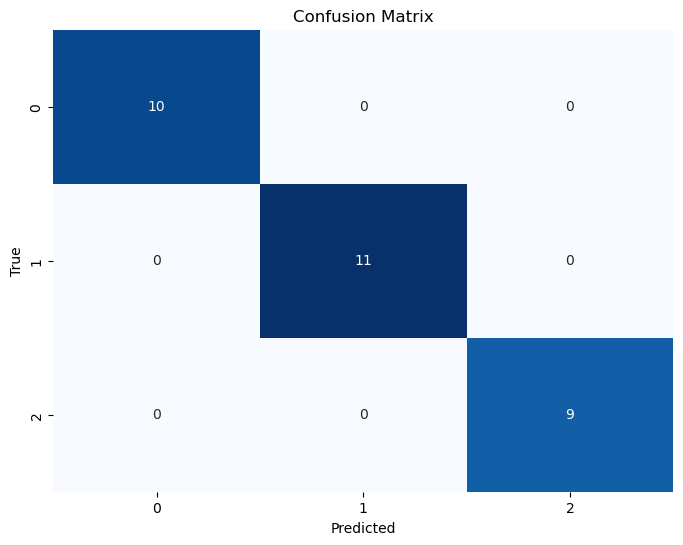

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score



# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
for class_label, prec, rec in zip(model.classes_, precision, recall):
    print(f'Class: {class_label}')
    print(f'  Precision: {prec:.4f}')
    print(f'  Recall: {rec:.4f}')

print(f'Overall Accuracy: {accuracy:.4f}')

[1. 1. 1.]
Class: 0
  Precision: 1.0000
  Recall: 1.0000
Class: 1
  Precision: 1.0000
  Recall: 1.0000
Class: 2
  Precision: 1.0000
  Recall: 1.0000
Overall Accuracy: 1.0000
